In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You will work with data from olympics. We will only be using `sex, age, height, weight, year, season, medal` columns

In [ ]:
df = pd.read_csv("/work/data/homework 10/athlete_events.csv")
df.columns = df.columns.str.lower()
df.head(6)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


# Weight

Use `sns.histplot()` arguments `data=..`, `x=..`, `bins=..`

Set the target dataframe, target x axis as weight, and selecct appropriate amount of bins (try different amounts, to see what do you think is alright)

(25.0, 140.0)

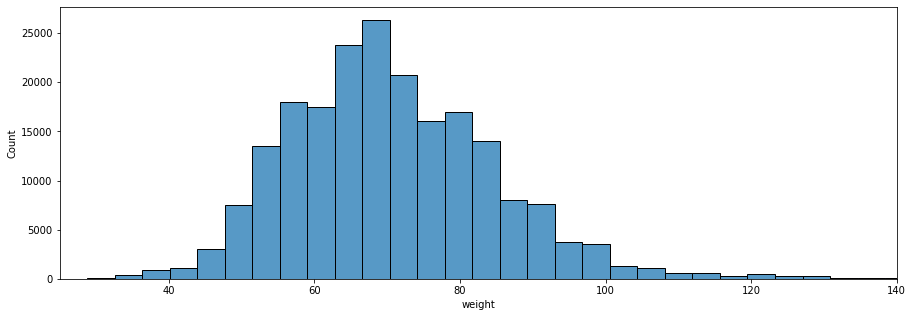

In [ ]:
plt.subplots(figsize=(15,5))

sns.histplot(data=df,
             x="weight",
             bins= 50,
             )
plt.xlim(25, 140)


# Height

similarly to the code above, do the same, but for height

<AxesSubplot:xlabel='height', ylabel='Count'>

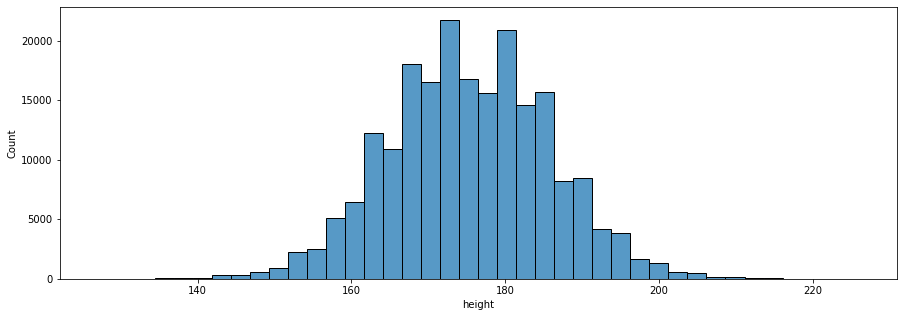

In [ ]:
plt.subplots(figsize=(15,5))

sns.histplot(data=df,
             x="height",
             bins= 40,
             )


# Combine both onto the same graph

Copy both your codes above into one code cell. To the weight graph add argument `color="red"` and to the height argument add `color="green"`

<AxesSubplot:xlabel='weight', ylabel='Count'>

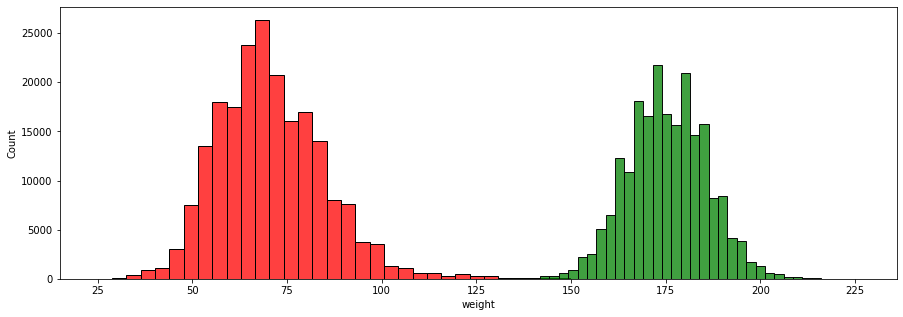

In [ ]:
plt.subplots(figsize=(15,5))

sns.histplot(data=df,
             x="weight",
             bins= 50,
             color="red"
             )


sns.histplot(data=df,
             x="height",
             bins= 40,
             color="green"
             )

copy the code above and let's add information about sex, to both graphs add argument `hue="sex"`.

the histograms become transparent and they are not really visible. Add argument `multiple="stack"` to stack them, and to make them readable.

<AxesSubplot:xlabel='weight', ylabel='Count'>

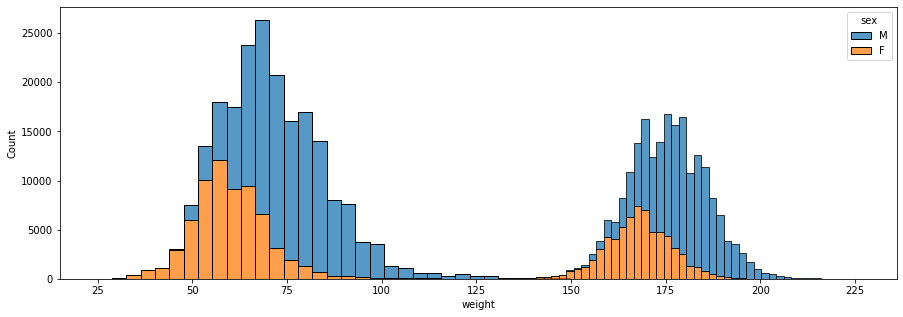

In [ ]:
plt.subplots(figsize=(15,5))

sns.histplot(data=df,
             x="weight",
             bins= 50,
             color= "red",
             hue="sex",
             multiple="stack"
             )

sns.histplot(data=df,
             x="height",
             bins= 50,
             color= "green",
             hue="sex",
             multiple="stack"
             )             

# WHAT WOULD YOU TELL SOMEONE IF YOU PRESENTED THEM THIS GRAPH?

using `sns.jointplot` plot `x` weight and `y` height

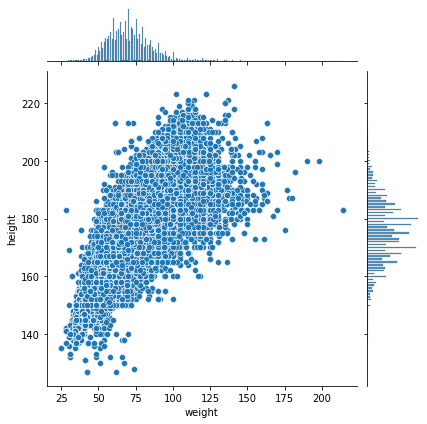

In [ ]:
sns.jointplot(data=df,
            x="weight", 
            y="height")

Copy the code above and add argument `kind="hex`, you will see that it looks rather bad because most of the grpah is just a white space.

Add arguments `xlim=(x1,x2)` and `ylim=(y1,y2)`, where the two numbers inside the limits will limit visible axis on the plot. For example having `xlim=(100,200)` - the graph will only show `x` axis from 100 to 200. Experiment with these two arguments, to make the hex jointplot nice and useful.

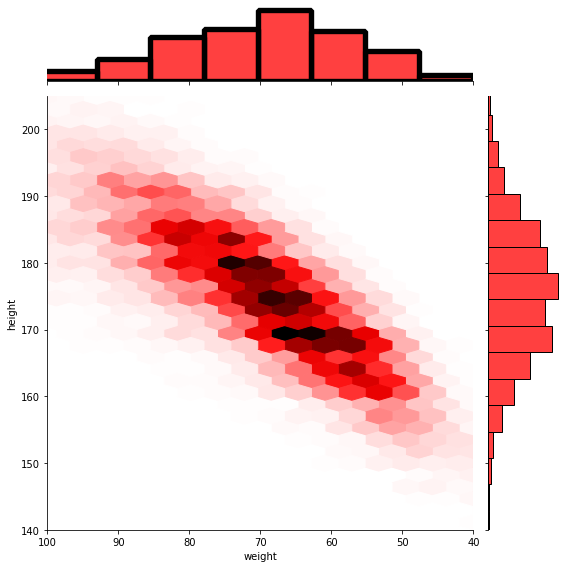

In [ ]:
sns.jointplot(height = 8,
             x="weight",
             y="height",
             data=df,
             kind="hex",
             color ="red",
             xlim=(100,40), 
             ylim=(140,205), 
             marginal_kws=dict(bins=25)
             )

# WHAT WOULD YOU SAY ARE ARE MOST COMMON VALUES?

Let's have a look at correlation between variables. Use `sns.heatmap(data)` where `data=df.corr()`

Once you create it, add following arguments one by one, to improve the way it looks because what you have right now, is not really usable. `vmax=.8`, `annot=True`, `fmt=".2f"`, `cmap="summer"`

<AxesSubplot:>

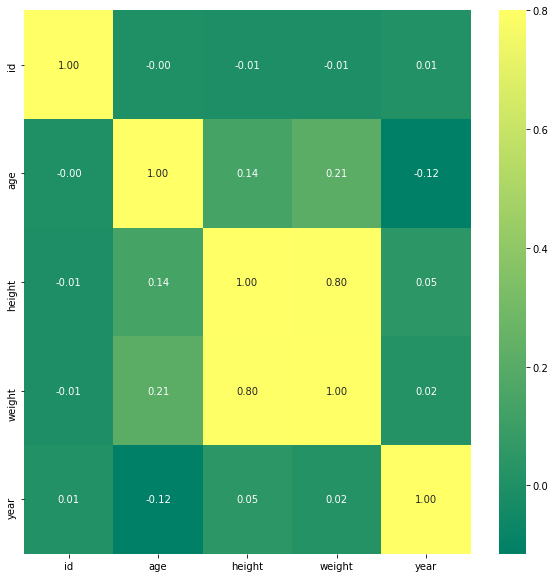

In [ ]:
plt.subplots(figsize=(10,10))

sns.heatmap(data=df.corr(),
            vmax=.8,
            annot=True,
            fmt=".2f",
            cmap="summer" )

# WHAT CAN YOU ASY ABOUT THE VARIABLE CORRELATION?

Let's plot the age of all the winners of the golden medal. Use `sns.countplot()` with `data` and `x="age"`.

You need to filter the df you pass to `data` since you only want to plot the golden winners - filter only those.

You will also need to filter those golden winners, such that "Age" column, does not contain missing data.

When you plot it, you will notice `x` axis has decimal places values, making it unreadable. You will need to change panda's column type of `age` to `int` (google)

In [ ]:
df_gold_medals = df[df["medal"] == "Gold"]
df_gold_medals = df_gold_medals[~df_gold_medals["age"].isna()]

# df["age"]=df["age"].fillna(0.0).astype(int)
# df= df[df["age"] != 0]

df_gold_medals["age"] = df_gold_medals["age"].astype('int32')

df_gold_medals["medal"].value_counts()

Gold    13224
Name: medal, dtype: int64

(0.0, 40.0)

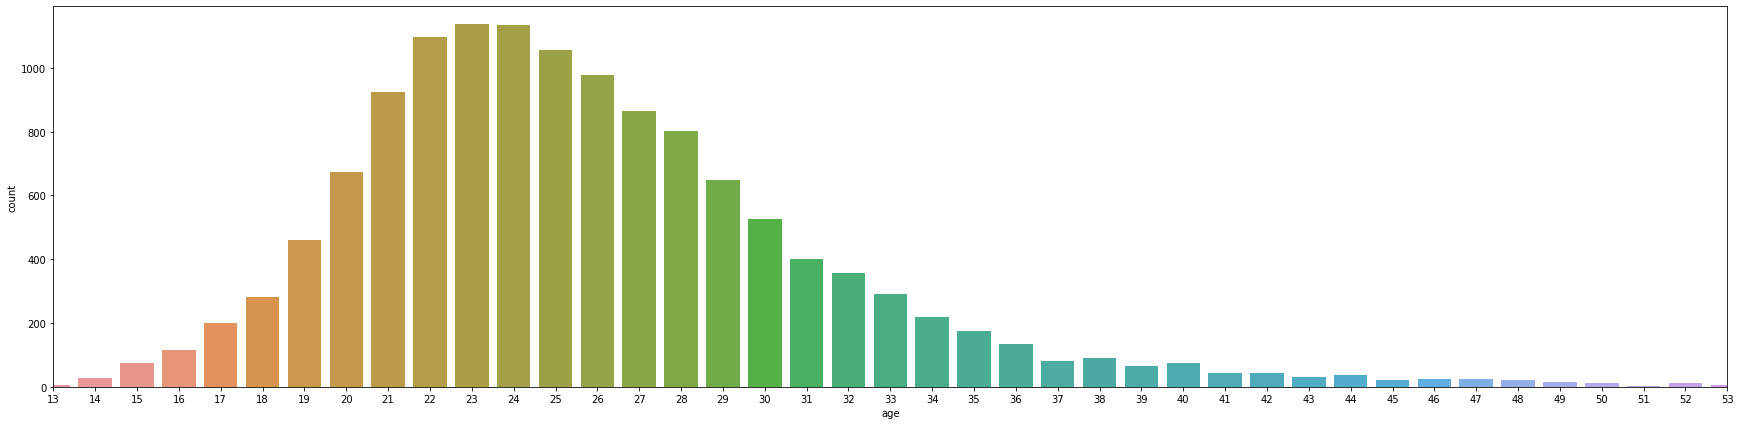

In [ ]:
ax = plt.subplots(figsize = (30,7))
ax= sns.countplot(data=df_gold_medals,
              x="age")
              
plt.xlim(0, 40)

# What can you tell about this graph?

Using the previous plot, determine at what age "most" people stop winning golden medals. Use that age to filter out all the golden winners older than that into `df_people_older_than_majority`. (remember to use the filtered dataset from the previous step otherwise you will have to filter missing values, and cast it as int again)

In [ ]:
df_people_older_than_majority = df_gold_medals[df_gold_medals["age"] >= 48]
df_people_older_than_majority.head(3)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
3306,1858,Fehaid Al-Deehani,M,49,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold
5078,2894,Derek Swithin Allhusen,M,54,180.0,71.0,Great Britain,GBR,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Gold
7961,4404,Johan August Anker,M,56,NaN,NaN,Norna,NOR,1928 Summer,1928,Summer,Amsterdam,Sailing,Sailing Mixed 6 metres,Gold


Now let's plot all the sports these "older athletes" won their medals in. Let's use `sns.countplot()` with `data` and `x="sport"`

In [ ]:
df_people_older_than_majority['sport'].value_counts()

Equestrianism       28
Sailing             25
Shooting            23
Archery             12
Art Competitions    11
Alpinism             4
Curling              3
Fencing              3
Bobsleigh            1
Polo                 1
Croquet              1
Roque                1
Name: sport, dtype: int64

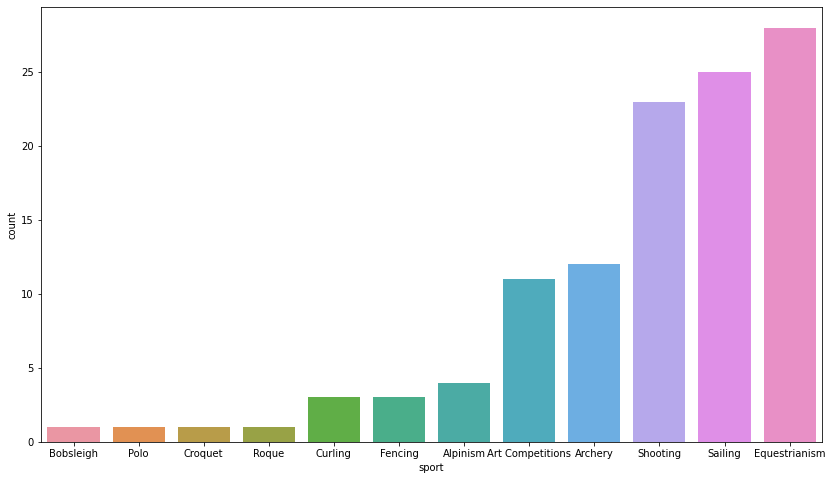

In [ ]:
plt.figure(figsize=(14, 8))

ax= sns.countplot(data=df_people_older_than_majority,
              x="sport",
              order = df_people_older_than_majority['sport'].value_counts().sort_values(ascending=True).index)

# WHAT CAN YOU COMMENT ABOUT THE GRAPH ABOVE?

Filter the original dataframe where you select only female `F` from `sex` and `summer` olympics in `season`. You should have a filtered dataframe of only women, attending summer olympics.

In [ ]:

df_women_golden = df[(df["sex"] == 'F') ] #& (df["season"] == 'Winter')
df_women_golden.head(2)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Let's plot women's attendance per year. We will use `sns.countplot()` where `data=df_women_summer` and `x="year"` 

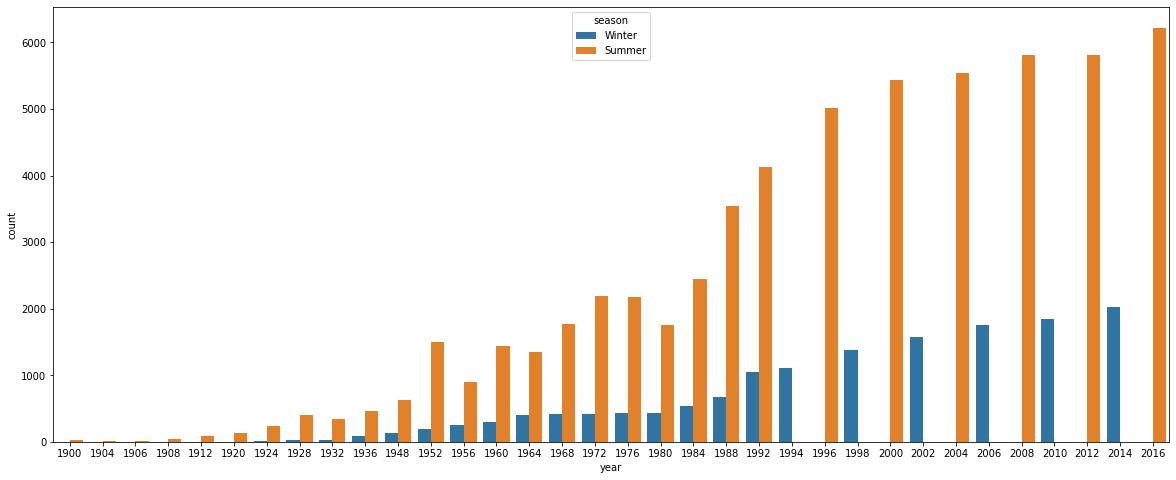

In [ ]:
ax = plt.subplots(figsize = (20,8))
ax= sns.countplot(data=df_women_golden,
              x="year",
              hue="season")

In [ ]:
df_women_golden_winter = df_women_golden[df_women_golden["season"] == "Winter"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Alpine Skiing'),
  Text(1, 0, 'Cross Country Skiing'),
  Text(2, 0, 'Speed Skating'),
  Text(3, 0, 'Biathlon'),
  Text(4, 0, 'Figure Skating'),
  Text(5, 0, 'Short Track Speed Skating'),
  Text(6, 0, 'Ice Hockey'),
  Text(7, 0, 'Freestyle Skiing'),
  Text(8, 0, 'Snowboarding'),
  Text(9, 0, 'Luge'),
  Text(10, 0, 'Curling'),
  Text(11, 0, 'Bobsleigh'),
  Text(12, 0, 'Skeleton'),
  Text(13, 0, 'Ski Jumping')])

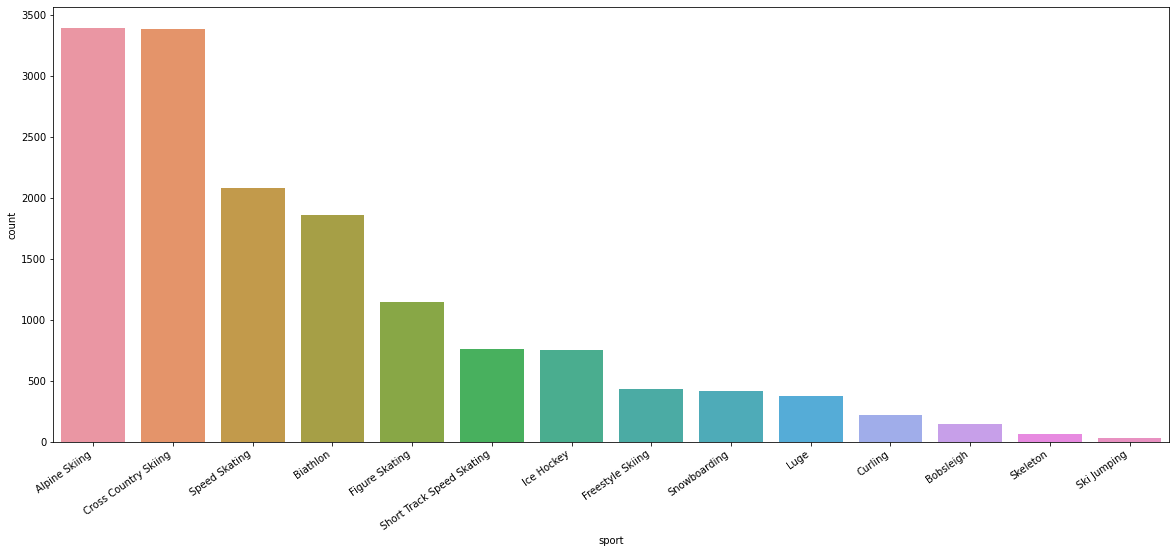

In [ ]:
ax = plt.subplots(figsize = (20,8))
ax= sns.countplot(data=df_women_golden_winter,
              x="sport",
              order = df_women_golden_winter["sport"].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=35, horizontalalignment="right")

# WHAT CAN YOU SAY ABOUT THIS?

Let's expand on the above idea, and take the filtered women's dataset, and plot their ages for every single year.

To do this, we will use `sns.boxplot()` where `data=filtered_women_summer`, `x="year"` and `y="age"`

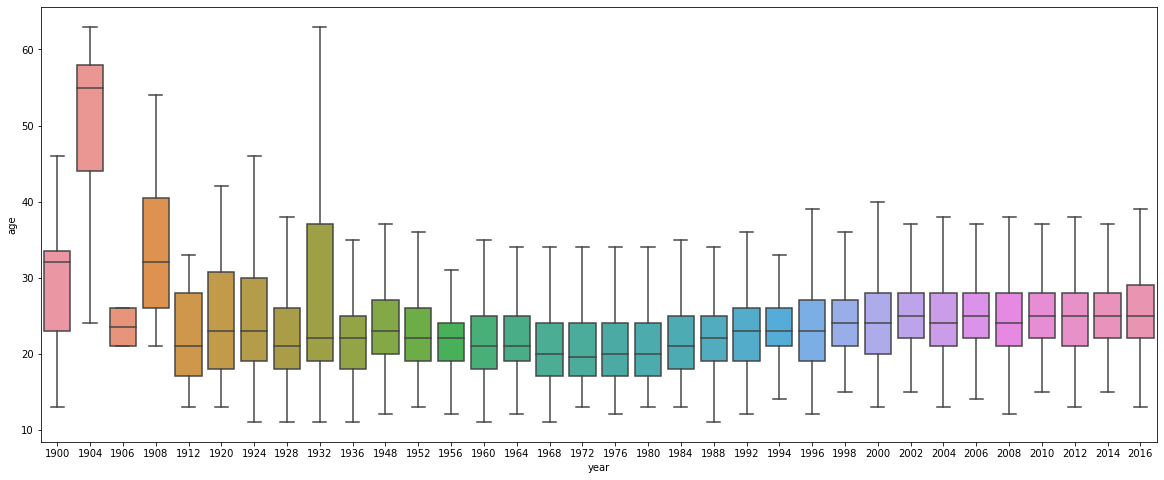

In [ ]:
plt.figure(figsize=(20, 8))

ax= sns.boxplot(data=df_women_summer,
                  x="year",
                  y="age", showfliers = False)


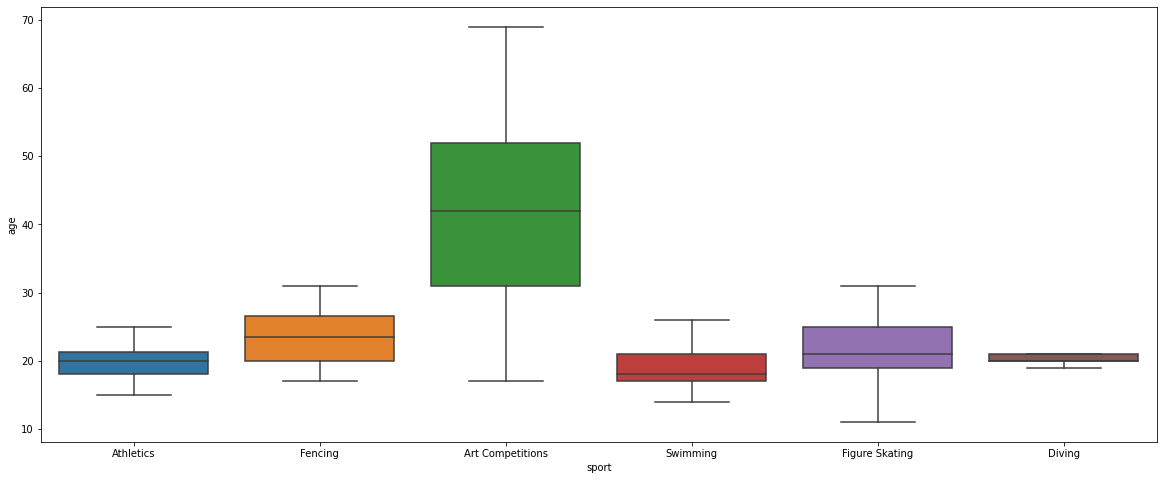

In [ ]:
plt.figure(figsize=(20, 8))

ax= sns.boxplot(data=df_women_summer[df_women_summer["year"] == 1932],
                  x="sport",
                  y="age", showfliers = False)

In [ ]:
df[df["sport"]== "Art Competitions"].groupby("year").count()

,id,name,sex,age,height,weight,team,noc,games,season,city,sport,event,medal
year,,,,,,,,,,,,,,
1912,33,33,33,25,0,0,33,33,33,33,33,33,33,7
1920,11,11,11,11,0,0,11,11,11,11,11,11,11,11
1924,318,318,318,226,9,3,318,318,318,318,318,318,318,15
1928,808,808,808,698,4,4,808,808,808,808,808,808,808,30
1932,1124,1124,1124,1015,42,45,1124,1124,1124,1124,1124,1124,1124,25
1936,813,813,813,702,3,2,813,813,813,813,813,813,813,35
1948,471,471,471,394,1,1,471,471,471,471,471,471,471,33


<AxesSubplot:xlabel='year', ylabel='age'>

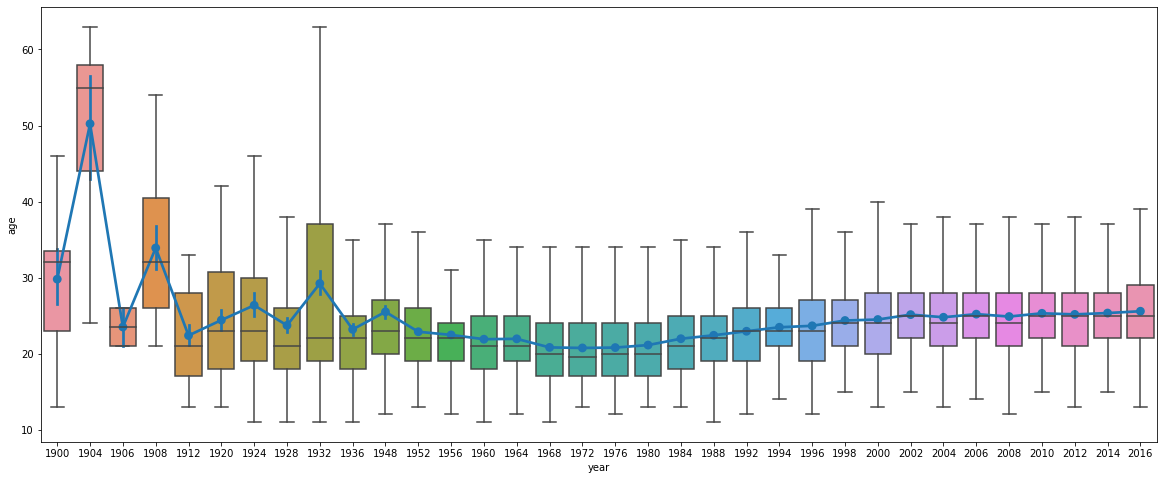

In [ ]:
plt.figure(figsize=(20, 8))

sns.pointplot(data=df_women_summer,
                  x="year",
                  y="age", showfliers = False)

sns.boxplot(data=df_women_summer,
                  x="year",
                  y="age", showfliers = False)


# What can you see on the graph

Take the same filtered dataframe, and let's plot weight variation over time.

Use the same code as above, but for this, let's use `sns.pointplot` instead of `sns.boxplot`, and change `y="weight"` since we want to see weight. Try both though, and see the difference.

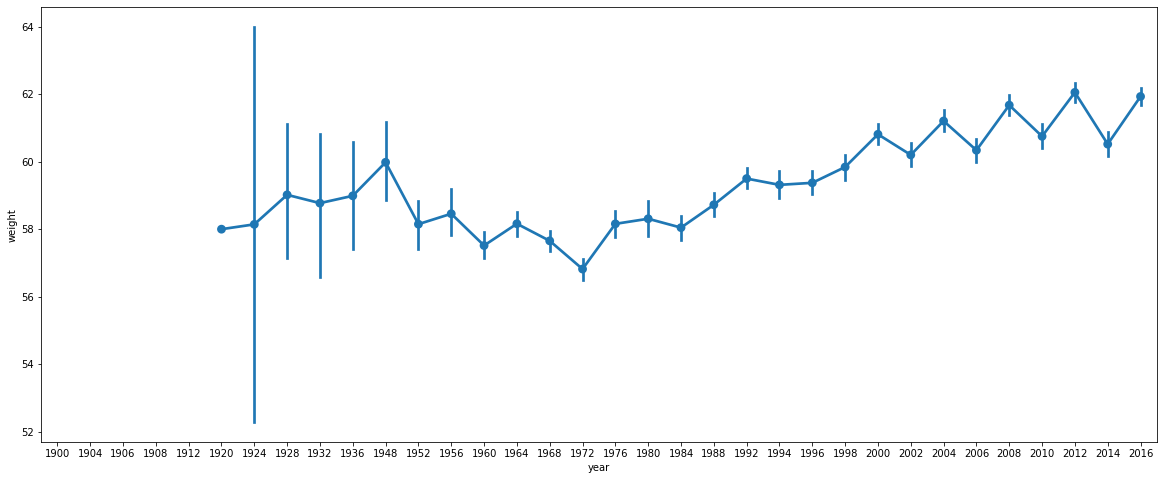

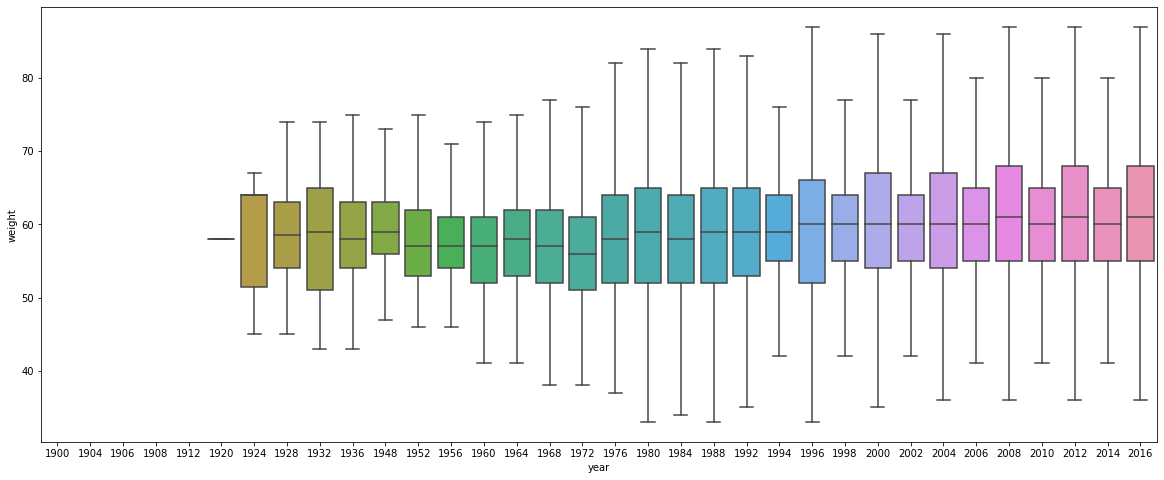

In [ ]:
plt.figure(figsize=(20, 8))
ax= sns.pointplot(data=df_women_summer,
                  x="year",
                  y="weight")

plt.figure(figsize=(20, 8))
ax= sns.boxplot(data=df_women_summer,
                  x="year",
                  y="weight", showfliers = False)

<AxesSubplot:xlabel='weight', ylabel='Count'>

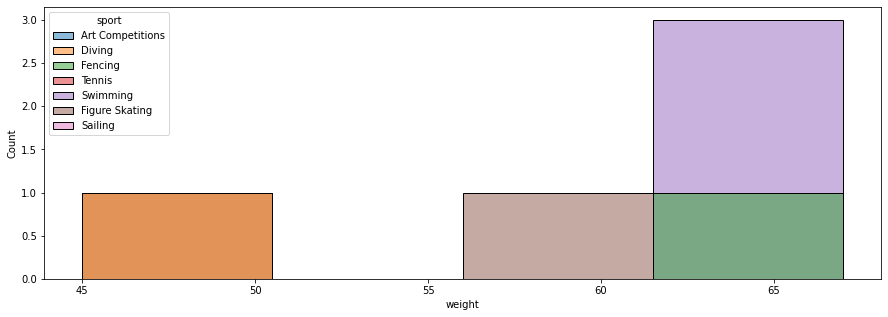

In [ ]:
plt.subplots(figsize=(15,5))

sns.histplot(data=df_women_summer[df_women_summer["year"] == 1924],
             x="weight",
             hue="sport"
             )


# Which one is more better for this type of data? Box or point plot

Do the same thing but with height.

Go here https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=palette and try using argument `palette=..." with whatever pallete you choose. Does it improve the graph?

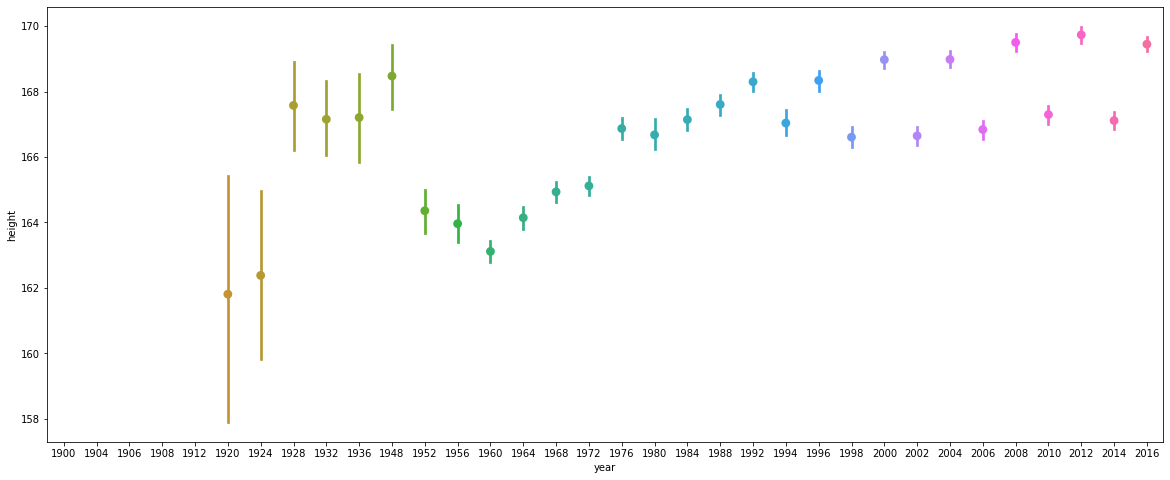

In [ ]:
plt.figure(figsize=(20, 8))
ax= sns.pointplot(data=df_women_summer,
                  x="year",
                  y="height",
                  palette="husl")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>